Analysis of variance (ANOVA) is a statistical model used to analyze differences between means.

It appears that ANOVA is sometimes used for feature selection.

[How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

We will perform feature extraction using ANOVA on a special dataset of "large p small n".


In [1]:
import os

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
from sklearn import preprocessing, metrics
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten,Dropout,Dense
# from tensorflow.keras.optimizers import SGD, Adam
# from tensorflow.keras import regularizers
# from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from tensorflow import keras
import itertools
%matplotlib inline
print(__doc__)

# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Flatten, Conv2D
# from tensorflow.keras.activations import sigmoid, relu
# from tensorflow.keras import Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


import matplotlib.pyplot as plt

# from sklearn.datasets import load_diabetes
import math, time, random, datetime
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, LSTM
# from tensorflow import keras
from tqdm import tqdm

Automatically created module for IPython interactive environment


In [4]:
def calculate_performace(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn + 1
            else:
                fp = fp + 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp)
    sensitivity = float(tp) / (tp + fn)
    specificity = float(tn) / (tn + fp)
    MCC = float(tp * tn - fp * fn) / (np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))
    return acc, precision, sensitivity, specificity, MCC

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    xmin, xmax = plt.xlim()  # return the current xlim
    plt.xlim((xmin, xmax))  # set the xlim to xmin, xmax
    plt.ylim(xmin, xmax)  # set the xlim to xmin, xmax

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_performance(train_loss,val_loss,train_acc,val_acc):
    # plot train and validation loss across multiple runs
    plt.plot(train_loss, color='blue', label='train')
    plt.plot(val_loss, color='orange', label='validation')
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

    plt.plot(train_acc, color='blue', label='train')
    plt.plot(val_acc, color='orange', label='validation')
    plt.title('model train vs validation loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
def transfer_label_from_prob(proba):
    label = [1 if val >= 0.5 else 0 for val in proba]
    return label
def plot_roc_curve(labels, probality, legend_text, auc_tag=True):
    # fpr2, tpr2, thresholds = roc_curve(labels, pred_y)
    fpr, tpr, thresholds = roc_curve(labels, probality)  # probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    if auc_tag:
        rects1 = plt.plot(fpr, tpr, label=legend_text + ' (AUC=%6.3f) ' % roc_auc)
    else:
        rects1 = plt.plot(fpr, tpr, label=legend_text)

In [5]:
url_dataset = './featureSet/_6_dRules_lbl_fvs.csv'
df_dRules = pd.read_csv(url_dataset, header=0)

df_dRules = df_dRules.fillna(0)
# X = df_dRules.iloc[:,:-1]
y = df_dRules.iloc[:,-1] # Target Class

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
labels = y = encoder.fit_transform(y)
print(y)

[1 0 1 ... 1 1 1]


In [6]:
url_dataset = './featureSet/_2_kmer_fvs.csv'
df_kmer = pd.read_csv(url_dataset, header=0)

df_kmer = df_kmer.fillna(0)

url_dataset = './featureSet/_3_LCnM_fvs.csv'
df_LCnM = pd.read_csv(url_dataset, header=0)

df_LCnM = df_LCnM.fillna(0)

url_dataset = './featureSet/_4_PC_Pse_KNC.csv'
df_PC = pd.read_csv(url_dataset, header=0)

df_PC = df_PC.fillna(0)

url_dataset = './featureSet/_5_SC_Pse_KNC.csv'
df_SC = pd.read_csv(url_dataset, header=0)

df_SC = df_SC.fillna(0)

In [7]:
df_main = pd.concat([df_dRules.iloc[:,:-1], df_kmer, df_PC, df_SC, df_LCnM],axis=1)
df_main.head()

,1stU,GC_Per,GC_Per1,GC_Flag,ntReps,dintReps,trintReps,b7_U,b4-8,s_5Bar,...,SVV_9,SVV_10,SVV_11,SVV_12,SVV_13,SVV_14,SVV_15,SVV_16,SVV_17,SVV_18
0,1,0.00,47.37,1,1,1,1.0,0,0,-1,...,2,1,4,2,1,4,1,2,2,4
1,1,0.00,47.37,1,1,1,1.0,0,0,-1,...,1,3,3,3,4,4,4,3,3,1
2,0,0.00,47.37,1,1,1,1.0,1,0,-1,...,3,3,4,4,4,4,2,1,2,4
3,1,0.00,47.37,1,1,1,1.0,0,0,1,...,3,1,4,1,2,4,3,4,2,1
4,1,5.26,52.63,1,1,1,1.0,0,0,-1,...,4,3,3,2,4,1,4,2,2,1


In [8]:
# X_test, y_test = df_test.iloc[:,:-1], df_test.iloc[:,-1].values#.astype('int')
# X_valid, y_valid = df_valid.iloc[:,:-1], df_valid.iloc[:,-1].values#.astype('int')

Search for age-dependent transcripts in 3 groups: yonger age (0-5 years), middle age (9-10 years), and old age (19-20 years)

yonger age (0-5 years) 　→　0

middle age (9-10 years)　→　1

old age (19-20 years)　 →　2

In [9]:
# columns = raw.columns
# X = raw
# y = 2,1,1,1,2,2,0,0,0,2
# columns = df_main.columns

X1 = df_main.iloc[:,:] # df_main.iloc[:,:-1]
# y= df_main.iloc[:,-1] # df_main.iloc[:,-1]
scaler = StandardScaler().fit(X=X1, y=y)
X = scaler.transform(X1)

In [10]:
X1.columns

Index(['1stU', 'GC_Per', 'GC_Per1', 'GC_Flag', 'ntReps', 'dintReps',
       'trintReps', 'b7_U', 'b4-8', 's_5Bar',
       ...
       'SVV_9', 'SVV_10', 'SVV_11', 'SVV_12', 'SVV_13', 'SVV_14', 'SVV_15',
       'SVV_16', 'SVV_17', 'SVV_18'],
      dtype='object', length=698)

In [11]:
columns = X1.columns

In [12]:
selector = SelectKBest(f_classif, k=20) # k is the number of features to be selected
X_new = selector.fit_transform(X, y)

c:\Users\AttiqRafiq\.conda\envs\pyml39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  4   5 432 438 462 468 492 498] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\AttiqRafiq\.conda\envs\pyml39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [13]:
print('feature importance: ', selector.scores_)

feature importance:  [1.04696325e+00 5.95027738e+00 3.36167301e+00 8.03114565e+00
            nan            nan 8.29866195e-01 3.34859339e-03
 1.46105038e+00 1.84763838e-01 5.23932163e-02 3.49160789e+00
 6.47960717e-02 4.29622350e+00 2.79437802e+00 7.09170067e-03
 1.44741195e+00 4.23155170e+00 6.66325610e-01 2.68609089e+00
 1.31975380e+00 1.71653512e-02 9.69344520e+00 5.95180683e+00
 4.15748905e-01 1.61096825e-01 1.90102590e-01 7.52064134e-02
 1.34563172e-01 1.28014078e+01 2.31517995e+00 3.60903832e+00
 6.08582865e-03 1.78917340e+00 8.09854334e-02 2.13399923e+00
 2.14258576e+00 4.09747222e-01 3.63625102e+00 8.77516627e-03
 3.23413313e+00 1.39603453e-02 1.42448569e-02 9.40780960e+00
 4.06422967e+01 7.77016401e+00 3.64754398e+00 3.90891047e+00
 1.89935923e-03 6.43148113e+00 6.85704657e+00 4.37821372e+00
 8.24566852e+00 1.88769174e-01 5.20719747e-01 5.64544623e+00
 9.98536476e-03 1.47492278e-01 6.31674605e-03 5.65410843e+00
 1.17348498e+01 2.24160174e-02 2.23343453e+00 9.39918554e-01
 5.

In [14]:
print('pvalues: ', selector.pvalues_)

pvalues:  [3.06320012e-01 1.47935044e-02 6.68652763e-02 4.63991309e-03
            nan            nan 3.62411023e-01 9.53859799e-01
 2.26892964e-01 6.67352935e-01 8.18971300e-01 6.18134556e-02
 7.99093912e-01 3.83132974e-02 9.47376781e-02 9.32895352e-01
 2.29073133e-01 3.97967984e-02 4.14423982e-01 1.01370864e-01
 2.50761126e-01 8.95774150e-01 1.87305864e-03 1.47807104e-02
 5.19133144e-01 6.88187679e-01 6.62874025e-01 7.83927568e-01
 7.13782201e-01 3.53844465e-04 1.28260182e-01 5.75969950e-02
 9.37825823e-01 1.81165168e-01 7.75993181e-01 1.44207251e-01
 1.43403104e-01 5.22164490e-01 5.66642395e-02 9.25375179e-01
 7.22554969e-02 9.05956499e-01 9.05007528e-01 2.18694200e-03
 2.22051616e-10 5.35725711e-03 5.62818793e-02 4.81553910e-02
 9.65241843e-01 1.12801536e-02 8.88983002e-03 3.65154587e-02
 4.12402168e-03 6.63985612e-01 4.70611503e-01 1.75859326e-02
 9.20411547e-01 7.00980553e-01 9.36659690e-01 1.74995043e-02
 6.24663441e-04 8.80999413e-01 1.35196758e-01 3.32405359e-01
 2.35517366e-0

In [13]:
feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)

num_list = []
col_list = []
for i in range(522): # 2345
    num_list.append((sorted_feature_scores[i])[0])
    col_list.append((sorted_feature_scores [i])[1])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'ntReps'),
  Text(1, 0, 'dintReps'),
  Text(2, 0, 'freq_ATG'),
  Text(3, 0, 'RAAPIV_ATG'),
  Text(4, 0, 'AAPIV_ATG'),
  Text(5, 0, 'RAAPIV_GCG'),
  Text(6, 0, 'freq_TTT'),
  Text(7, 0, 'freq_GCG'),
  Text(8, 0, 'AAPIV_TTT'),
  Text(9, 0, 'RAAPIV_TTT'),
  Text(10, 0, 'RAAPIV_TGA'),
  Text(11, 0, 'PKNC_16'),
  Text(12, 0, 'RAAPIV_CGC'),
  Text(13, 0, 'RAAPIV_GAT'),
  Text(14, 0, 'freq_TT'),
  Text(15, 0, 'AAPIV_CCA'),
  Text(16, 0, 'freq_CTG'),
  Text(17, 0, 'AAPIV_GA'),
  Text(18, 0, 'freq_GAT'),
  Text(19, 0, 'freq_TGA')])

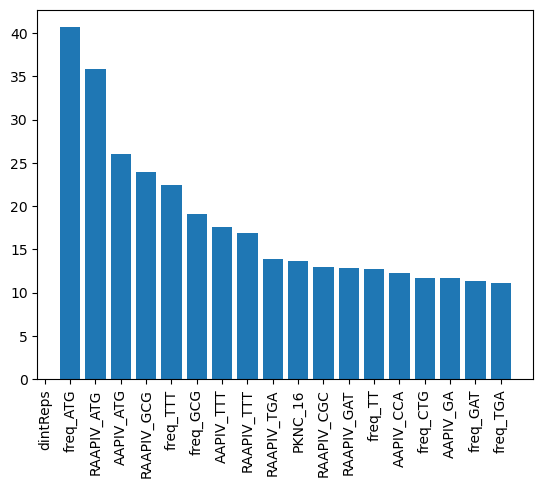

In [14]:
plt.bar(col_list[0:20],num_list[0:20])
plt.xticks(rotation=90)

To determine which features to adopt, the significance level is set to 0.05 in advance.

Features with F values greater than that value are rejected.

In [15]:
from scipy.stats import f
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df_main.shape[1]

698

In [17]:
dfn = 2 # Inter-level degrees of freedom(3-1)
dfd = df_main.shape[1]-1 # 2343 # Intra-level degrees of freedom(2345-2)

upper 5%: 3.008645016909287


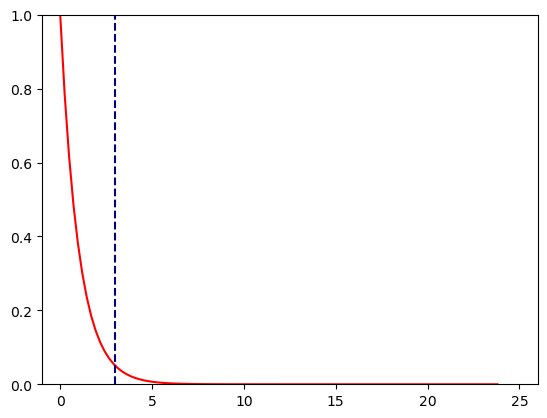

In [18]:
fig, ax = plt.subplots(1, 1)

plt.xlim(-1,26)
plt.ylim(0,1)
x = np.linspace(f.ppf(0.0000000001, dfn, dfd),f.ppf(0.9999999999, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd), 'r-')
ax.axvline(f.ppf(0.95, dfn, dfd), ls = "--", color = "navy")
print('upper 5%:', f.ppf(0.95, dfn, dfd))

In [19]:
df = pd.DataFrame(num_list,index=col_list,columns=['importance'])
df

,importance
ntReps,NaN
dintReps,NaN
freq_ATG,40.642297
RAAPIV_ATG,35.843623
AAPIV_ATG,26.043499
...,...
AAPIV_AGT,0.079850
cm_SMat_5,0.079785
rm_SMat_2,0.079294
freq_TC,0.075206


In [20]:
df.shape

(522, 1)

In [21]:
DE = df[df["importance"]>f.ppf(0.95, dfn, dfd)]
DE

,importance
freq_ATG,40.642297
RAAPIV_ATG,35.843623
AAPIV_ATG,26.043499
RAAPIV_GCG,23.922672
freq_TTT,22.459132
...,...
RAAPIV_TAG,3.169364
AAPIV_GGA,3.160936
RAAPIV_AA,3.137465
RAAPIV_ACC,3.109498


We extracted 494 significant lncRNAs!
The lncRNA particularly important for age dependency was ENST00000613063.1.

In [22]:
DE.shape

(124, 1)

In [23]:
DE.to_csv('fea_select_1.csv')

In [24]:
type(DE.index.to_list())

list

In [25]:
sel_Fea = X1.loc[:,DE.index.to_list()]

In [26]:
sel_Fea

,freq_ATG,RAAPIV_ATG,AAPIV_ATG,RAAPIV_GCG,freq_TTT,freq_GCG,AAPIV_TTT,RAAPIV_TTT,RAAPIV_TGA,PKNC_16,...,SVV_11,PKNC_3,freq_AGG,rm_dRPRIM_0,cm_dRPRIM_0,RAAPIV_TAG,AAPIV_GGA,RAAPIV_AA,RAAPIV_ACC,RAAPIV_GAC
0,0.000000,0,0,0,0.000000,0.0,0,0,0,0.031018,...,4,0.000000,0.000000,0.000408,0.000409,0,7,0,2,10
1,5.263158,16,2,0,5.263158,0.0,14,4,0,0.050793,...,3,0.025397,5.263158,0.000324,0.000324,0,23,21,0,0
2,0.000000,0,0,0,10.526316,0.0,25,11,0,0.111671,...,4,0.000000,0.000000,0.000437,0.000438,0,0,0,0,0
3,0.000000,0,0,0,0.000000,0.0,0,0,17,0.000000,...,4,0.101872,5.263158,0.000666,0.000667,0,7,0,0,0
4,0.000000,0,0,0,0.000000,0.0,0,0,0,0.030483,...,3,0.000000,0.000000,0.000508,0.000508,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.000000,0,0,0,5.263158,0.0,4,14,17,0.059365,...,4,0.029682,0.000000,0.000370,0.000371,0,0,3,5,0
2198,0.000000,0,0,0,5.263158,0.0,7,11,0,0.092144,...,1,0.030715,0.000000,0.000287,0.000288,0,0,31,0,0
2199,0.000000,0,0,0,0.000000,0.0,0,0,1,0.000000,...,3,0.030293,0.000000,0.000767,0.000767,0,1,0,10,0
2200,0.000000,0,0,0,0.000000,0.0,0,0,0,0.060361,...,2,0.030181,0.000000,0.000497,0.000498,0,0,12,0,0


In [27]:
newX = sel_Fea.values

In [28]:
std_scale = preprocessing.StandardScaler().fit(newX, y)
newX = std_scale.transform(newX)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.2, shuffle=True, random_state=42)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors._classification import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ADA = AdaBoostClassifier(random_state=123,learning_rate=0.01)
BAG = BaggingClassifier(random_state=123, n_jobs=-1)
DTC = DecisionTreeClassifier(random_state=123)
ETC = ExtraTreeClassifier(random_state=123)
ETCs = ExtraTreesClassifier(random_state=123,n_jobs=-1, n_estimators=500)
GNB = GaussianNB()
KNC = KNeighborsClassifier(n_jobs=-1)
LR = LogisticRegression(random_state=123,n_jobs=-1, max_iter=1000)
nuSVC = NuSVC(random_state=123,probability=True)
PER = Perceptron(random_state=123,n_jobs=-1, max_iter=500)
RFC = RandomForestClassifier(random_state=123,n_jobs=-1, n_estimators=500)
SGD = SGDClassifier(random_state=123,max_iter=1000,n_jobs=-1)
svc = SVC(random_state=123, probability=True, C=0.1, gamma='scale', kernel='rbf')
XGB = XGBClassifier(random_state=123, use_label_encoder=False)
LGBM = LGBMClassifier(random_state=123,n_jobs=-1, learning_rate=0.01)
lazyClf = [('AdaBoostClassifier', ADA),
 ('BaggingClassifier', BAG),
 ('DecisionTreeClassifier', DTC),
 ('ExtraTreeClassifier', ETC),
 ('ExtraTreesClassifier', ETCs),
 ('GaussianNB', GNB),
 ('KNeighborsClassifier', KNC),
 ('LogisticRegression', LR),
 ('NuSVC', nuSVC),
 ('Perceptron', PER),
 ('RandomForestClassifier', RFC),
 ('SGDClassifier', SGD),
 ('SVC', svc),
 ('XGBClassifier', XGB),
 ('LGBMClassifier', LGBM)]

C:\Users\AttiqRafiq\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [33]:
def train_classifiers(clfList, X_train, y_train, X_test, y_test):
    _accs = []
    _aucs = []
    _names = []
    _specs = []
    _sens = []
    _mccs = []
    _f1scores = []
    _proba = []
    for i in tqdm (range(len(lazyClf)), desc="Processing..."):
        clfList[i][1].fit(X_train, y_train)
        try:
            proba = clfList[i][1].predict_proba(X_test)[:,1]
            # with open(clfList[i][0]+'.pkl', 'wb') as f:
            #     pickle.dump(clfList[i][1], f, pickle.HIGHEST_PROTOCOL)
        except:
            continue
        else:
            proba = clfList[i][1].predict(X_test)
        r_pred = [1 if val >= 0.5 else 0 for val in proba]
        acc, prec, sens, spec, mcc = calculate_performace(len(y_test), r_pred, y_test) 
        f1score = f1_score(y_true=y_test, y_pred=r_pred)
        fpr, tpr, threshold = roc_curve(y_test, proba)
        auc_clf = auc(fpr, tpr)
        _aucs.append(auc_clf)
        _accs.append(acc)
        _sens.append(sens)
        _specs.append(spec) 
        _mccs.append(mcc)
        _f1scores.append(f1score)
        _names.append(clfList[i][0])
        _proba.append(proba)

    scoreDataFrame = pd.DataFrame({'Model':_names, 'Accuracy': _accs, 'ROC AUC': _aucs, 'F1 Score':_f1scores,'Sens':_sens, 'Spec':_specs, 'MCC':_mccs})
#     scoreDataFrame = scoreDataFrame.sort_values(by='Accuracy', ascending=False)
    return scoreDataFrame, _proba


In [34]:
score, proba = train_classifiers(lazyClf, X_train, y_train, X_test, y_test)
score

Processing...: 100%|██████████| 15/15 [00:31<00:00,  2.12s/it]


,Model,Accuracy,ROC AUC,F1 Score,Sens,Spec,MCC
0,AdaBoostClassifier,0.573696,0.555970,0.673611,0.825532,0.286408,0.133375
1,BaggingClassifier,0.655329,0.656528,0.663717,0.638298,0.674757,0.312417
2,DecisionTreeClassifier,0.632653,0.632256,0.649351,0.638298,0.626214,0.264054
3,ExtraTreeClassifier,0.614512,0.612838,0.638298,0.638298,0.587379,0.225677
4,ExtraTreesClassifier,0.743764,0.739207,0.770791,0.808511,0.669903,0.484435
5,GaussianNB,0.607710,0.610649,0.605923,0.565957,0.655340,0.221439
6,LogisticRegression,0.637188,0.629922,0.685039,0.740426,0.519417,0.266958
7,NuSVC,0.734694,0.732793,0.753684,0.761702,0.703883,0.466405
8,RandomForestClassifier,0.743764,0.737110,0.777120,0.838298,0.635922,0.486653
9,SVC,0.571429,0.542161,0.710567,0.987234,0.097087,0.189214


Model  AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.29      0.39       206
           1       0.57      0.83      0.67       235

    accuracy                           0.57       441
   macro avg       0.58      0.56      0.53       441
weighted avg       0.58      0.57      0.54       441

AUC 0.5864284238793638
------------------------------------------------------------------------------------------
Model  BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.61       206
           1       0.66      0.77      0.71       235

    accuracy                           0.67       441
   macro avg       0.67      0.66      0.66       441
weighted avg       0.67      0.67      0.66       441

AUC 0.7218549886387109
------------------------------------------------------------------------------------------
Model  DecisionTree

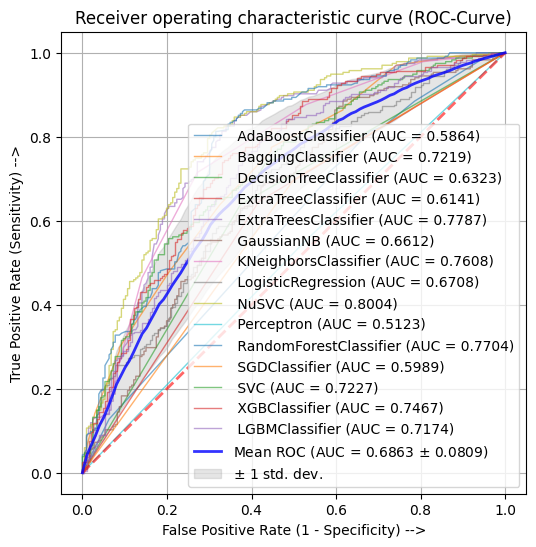

In [35]:
def drawCLF_AUC(modelList, probaList, y_test):
    # size = size
    # num_cross_val = cv  
    all_performance = []
    all_labels = []
    all_prob = {}
    num_classifier = 3
    all_prob[0] = []
    all_average = []
    repeat = 5
    tprs = []
    aucs = []
    accs = []
    foldnames = []
    specs = []
    sens = []
    mccs = []
    mean_fpr = np.linspace(0, 1, 100)
#     plt.figure(figsize=(6, 6), dpi=300)
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    fig.set_dpi(100)
    fold = 0
    
    for proba, name in zip(probaList, modelList):

        print("Model ", name)
        real_labels = test_label = y_test
        _proba = proba #clf.predict(test)
        y_pred_xgb = [1 if val >= 0.5 else 0 for val in _proba] # transfer_label_from_prob(_proba) # 

        acc, precision, sensitivity, specificity, MCC = calculate_performace(len(test_label),
                                                                                               y_pred_xgb,
                                                                                               np.array(test_label))
#         print(fold, acc, precision, sensitivity, specificity, MCC)
        # foldnames.append(fold); accs.append(acc); sens.append(sensitivity); specs.append(specificity); mccs.append(MCC)
        
    
        print('Classification Report:\n', classification_report(test_label, y_pred_xgb))
        fpr_keras, tpr_keras, _ = roc_curve(test_label, _proba)
        auc_keras = auc(fpr_keras, tpr_keras)
        print('AUC', auc_keras)
       
        ax.plot(fpr_keras, tpr_keras, #color='grey',
                label=r' {} (AUC = %0.4f)'.format(name) % (auc_keras),
                lw=1, alpha=.6)
        interp_tpr = np.interp(mean_fpr, fpr_keras, tpr_keras) 
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc_keras)

        # all_labels = all_labels + real_labels
        all_prob[0] = all_prob[0] + [val for val in _proba]  
        all_performance.append([acc, precision, sensitivity, specificity, MCC])
        print('---' * 30)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.6) # label='Mid Point', 

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')
    
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic curve (ROC-Curve)")
    ax.legend(loc="lower right")
    plt.xlabel('False Positive Rate (1 - Specificity) -->')
    plt.ylabel('True Positive Rate (Sensitivity) -->')
    plt.grid()
    
    # plt.axes
    plt.show()

drawCLF_AUC(score['Model'], proba, y_test)

In [49]:
def getSplitDataSet(X, y):
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    size = X.shape[1]
    scaler = StandardScaler()
    scaler.fit(X)# Fit only to the training data
    X = scaler.transform(X)

    from sklearn.model_selection import train_test_split, cross_val_score

    #split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train = np.array(X_train).reshape(-1,size,1)
    X_test = np.array(X_test).reshape(-1,size,1)
    return X_train, X_test, y_train, y_test

In [50]:
def getSplitDataSetLSTM(X, y):
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    size = X.shape[1]
    scaler = StandardScaler()
    scaler.fit(X)# Fit only to the training data
    X = scaler.transform(X)

    from sklearn.model_selection import train_test_split, cross_val_score

    #split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train = np.array(X_train).reshape(-1,1,size)
    X_test = np.array(X_test).reshape(-1,1,size)
    return X_train, X_test, y_train, y_test

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.2, shuffle=True, random_state=42)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten,Dropout,Dense, AveragePooling1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
import keras

In [41]:
checkpoint = keras.callbacks.ModelCheckpoint("fcn_model.h5", save_best_only=True)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), kernel_initializer='normal',),
#                        kernel_initializer='normal', kernel_regularizer="l2", input_shape=[XR.shape[1]]),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    
#     keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
# #                        kernel_initializer='normal', kernel_regularizer="l2"),
#     keras.layers.Dropout(0.5),
#     keras.layers.BatchNormalization(),
  
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='mae',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-2, decay=0.1),
              metrics=['mae'])

# model.compile(loss=BinaryCrossentropy(), optimizer=SGD(lr=0.01),
#                     metrics=['accuracy'])

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),#012500000118743628),
#               loss='mae',  # 'sparse_categorical_crossentropy',
#               metrics=['mae'])

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
checkpoint = [
        EarlyStopping(patience=250, monitor='val_loss', verbose=1, restore_best_weights=True), # monitor='val_accuracy'
        ReduceLROnPlateau(factor=0.2, patience=100, min_lr=0.00001, verbose=1),
        ModelCheckpoint('model11.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True)
    ]
              
history = model.fit(
    X_train, y_train, verbose=0,
    epochs=500,
    batch_size=16,
    validation_split=0.2,
    callbacks=[checkpoint]
)

In [44]:
proba = model.predict(X_test)
# print(proba) 0.0002500000118743628 /83785
r_pred = [1 if val >= 0.5 else 0 for val in proba]#transfer_label_from_prob(proba)
acc, precision, sensitivity, specificity, MCC = calculate_performace(len(y_test), 
                                                         r_pred, np.array(y_test))
print(acc, precision, sensitivity, specificity, MCC)
fpr_keras, tpr_keras, _ = roc_curve(y_test, proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC', auc_keras)


14/14 [==============================] - 0s 2ms/step
0.6825396825396826 0.6702508960573477 0.7957446808510639 0.5533980582524272 0.36133576249926214
AUC 0.7215038215244785


In [51]:
X_train, X_test, y_train, y_test = getSplitDataSet(newX, y)

In [52]:
def create_model_CNN():
    model = Sequential()
    model.add(tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    # model.add(keras.layers.BatchNormalization())
    model.add(Dropout(0.2))
    # model.add(tf.keras.layers.Conv1D(3, 3, padding='same', activation='relu'))
    # model.add(keras.layers.BatchNormalization())
    # model.add(Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    # model.add(Dense(512, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [53]:
def create_model_CNN1():
    model = Sequential()
    model.add(tf.keras.layers.Conv1D(64, 3, padding='valid', activation='relu'))
    model.add(tf.keras.layers.AveragePooling1D(pool_size=4))
#     model.add(keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Conv1D(128, 3, padding='valid', activation='relu'))
#     model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
#     model.add(keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Conv1D(128, 3, padding='valid', activation='relu'))
#     model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
#     model.add(keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Conv1D(128, 3, padding='valid', activation='relu'))
    
    # model.add(keras.layers.BatchNormalization())
    model.add(Dropout(0.2))
    # model.add(tf.keras.layers.Conv1D(3, 3, padding='same', activation='relu'))
    # model.add(keras.layers.BatchNormalization())
    # model.add(Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    # model.add(Dense(512, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(keras.layers.BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [58]:

def get_model(input_size):
    model = Sequential()
    model.add(tf.keras.layers.Conv1D(filters=128,kernel_size=32,padding='valid',activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(input_size,1)))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=8))
#     model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.6))
    model.add(tf.keras.layers.Flatten())
#     model.add(Dense(20,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#     model.add(Dropout(0.4))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

    return model

In [62]:
size = newX.shape[1]
# ACC 0.6716981132075471 Prec 0.6615384615384615 Sens 0.6666666666666666 Spec 0.6764705882352942 MCC 0.34307859394676643 AUC 0.7010373917008663
model = Sequential()
model.add(tf.keras.layers.Conv1D(128, 30, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling1D(pool_size=8))
# model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(tf.keras.layers.Conv1D(128, 30, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))
# model.add(tf.keras.layers.Conv1D(32, 10, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# # model.add(keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.Conv1D(32, 10, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# # model.add(keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.Conv1D(32, 10, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# # model.add(keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.Conv1D(32, 10, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
model.add(tf.keras.layers.Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# model = create_model_CNN1() # get_model(size)# 
model.compile(loss=BinaryCrossentropy(), optimizer=SGD(lr=0.1),#
                    metrics=['accuracy'])

# history = model.fit(XR, yR, validation_data=(X_testR, y_testR), epochs=100,
#                 batch_size=16, verbose=1)
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),#012500000118743628),
#               loss=BinaryCrossentropy(),#'binary_crossentropy',  # 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
        EarlyStopping(patience=550, monitor='val_accuracy', verbose=1, restore_best_weights=True), # monitor='val_accuracy'
#         ReduceLROnPlateau(factor=0.2, patience=50, min_lr=0.00001, verbose=1),
        ModelCheckpoint('model11.h5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)
    ]

history = model.fit(X_train, y_train, verbose=2, shuffle=True, epochs=2000, 
          callbacks=callbacks,
          batch_size=64,
#           validation_split=0.2
          validation_data=(X_test, y_test)
         )  

Epoch 1/2000

Epoch 1: val_accuracy improved from -inf to 0.57370, saving model to model11.h5
28/28 - 2s - loss: 0.8835 - accuracy: 0.5366 - val_loss: 0.7026 - val_accuracy: 0.5737 - 2s/epoch - 59ms/step
Epoch 2/2000

Epoch 2: val_accuracy improved from 0.57370 to 0.60091, saving model to model11.h5
28/28 - 0s - loss: 0.7897 - accuracy: 0.5684 - val_loss: 0.6983 - val_accuracy: 0.6009 - 186ms/epoch - 7ms/step
Epoch 3/2000

Epoch 3: val_accuracy did not improve from 0.60091
28/28 - 0s - loss: 0.7388 - accuracy: 0.5951 - val_loss: 0.6958 - val_accuracy: 0.5964 - 161ms/epoch - 6ms/step
Epoch 4/2000

Epoch 4: val_accuracy improved from 0.60091 to 0.63039, saving model to model11.h5
28/28 - 0s - loss: 0.7276 - accuracy: 0.5963 - val_loss: 0.6898 - val_accuracy: 0.6304 - 179ms/epoch - 6ms/step
Epoch 5/2000

Epoch 5: val_accuracy improved from 0.63039 to 0.63265, saving model to model11.h5
28/28 - 0s - loss: 0.7233 - accuracy: 0.6116 - val_loss: 0.6856 - val_accuracy: 0.6327 - 184ms/epoch - 7

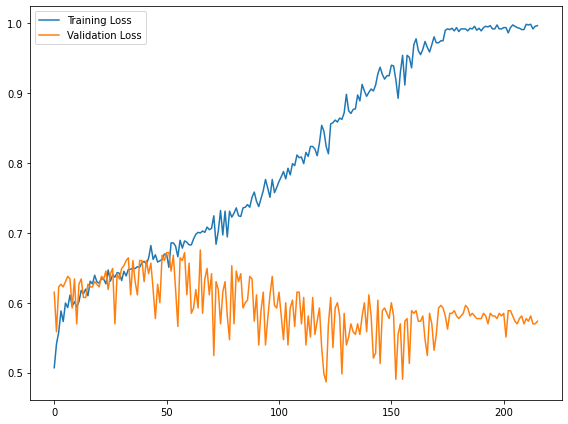

In [53]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["accuracy"], 
        label="Training Loss")
ax.plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
        label="Validation Loss")
ax.legend()

plt.tight_layout()
plt.show()

In [65]:
proba = model.predict(X_test[:,:])
# print(proba) 0.0002500000118743628 /83785
r_pred = [1 if val >= 0.55 else 0 for val in proba]#transfer_label_from_prob(proba)
acc, precision, sensitivity, specificity, MCC = calculate_performace(len(y_test), 
                                                         r_pred, y_test.ravel())
print(acc, precision, sensitivity, specificity, MCC)
fpr_keras, tpr_keras, _ = roc_curve(y_test, proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC', auc_keras)

# np.savetxt('results.csv', np.column_stack((proba,r_pred,y_test)), delimiter=',')
# proba = model.predict(X_validR)


# r_pred = [1 if val >= 0.5 else 0 for val in proba]#transfer_label_from_prob(proba)
# acc, precision, sensitivity, specificity, MCC = (calculate_performace(len(y_valid), 
#                                                                      r_pred, y_valid))
# print(acc, precision, sensitivity, specificity, MCC)
# # indX = np.array(ind_testset.iloc[:,:-1]).reshape(-1,21*45,1)
# # indY = ind_testset.iloc[:,-1]
# # proba = model_cnn.predict(indX)
# # # # print(proba)
# # r_pred = [1 if val >= 0.999 else 0 for val in proba]#transfer_label_from_prob(proba)
# # acc, precision, sensitivity, specificity, MCC = calculate_performace(len(indY), 
# #                                                                      r_pred, np.array(indY))
# # print(acc, precision, sensitivity, specificity, MCC)
# fpr_keras, tpr_keras, _ = roc_curve(y_valid, proba)
# auc_keras = auc(fpr_keras, tpr_keras)
# print('AUC', auc_keras)

14/14 [==============================] - 0s 2ms/step
0.7324263038548753 0.7413793103448276 0.7478260869565218 0.7156398104265402 0.4636665795546993
AUC 0.7677931176591799


In [51]:
from __future__ import print_function
import time


from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [58]:
# y = df_main.iloc[:,-1].values

In [52]:
feat_cols = sel_Fea.columns # [ 'FV'+str(i) for i in range(newX.shape[1]) ]

df = pd.DataFrame(newX,columns=feat_cols)
df['y'] = y
# df['label'] = df['y'].apply(lambda i: str(i))

# X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (2202, 125)


In [53]:
df.head()

,freq_ATG,RAAPIV_ATG,AAPIV_ATG,RAAPIV_GCG,freq_TTT,freq_GCG,AAPIV_TTT,RAAPIV_TTT,RAAPIV_TGA,PKNC_16,...,PKNC_3,freq_AGG,rm_dRPRIM_0,cm_dRPRIM_0,RAAPIV_TAG,AAPIV_GGA,RAAPIV_AA,RAAPIV_ACC,RAAPIV_GAC,y
0,-0.505539,-0.440615,-0.439467,-0.384573,-0.439490,-0.427838,-0.403692,-0.368011,-0.476374,0.084070,...,-1.242075,-0.686817,-0.456506,-0.456345,-0.368319,0.629548,-0.772872,-0.049776,1.511508,1
1,1.525843,2.758837,-0.053311,-0.384573,1.355978,-0.427838,2.074409,0.324605,-0.476374,0.657738,...,-0.507936,0.932425,-0.645755,-0.644962,-0.368319,3.365821,0.741306,-0.453485,-0.478531,0
2,-0.505539,-0.440615,-0.439467,-0.384573,3.151446,-0.427838,4.021489,1.536682,-0.476374,2.423794,...,-1.242075,-0.686817,-0.390885,-0.390749,-0.368319,-0.567572,-0.772872,-0.453485,-0.478531,1
3,-0.505539,-0.440615,-0.439467,-0.384573,-0.439490,-0.427838,-0.403692,-0.368011,2.827179,-0.815758,...,1.702728,0.932425,0.122260,0.121184,-0.368319,0.629548,-0.772872,-0.453485,-0.478531,1
4,-0.505539,-0.440615,-0.439467,-0.384573,-0.439490,-0.427838,-0.403692,-0.368011,-0.476374,0.068558,...,-1.242075,-0.686817,-0.233504,-0.233992,-0.368319,-0.567572,-0.772872,-0.453485,-0.478531,1


In [54]:
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [55]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.10204667 0.09076517 0.06818114]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

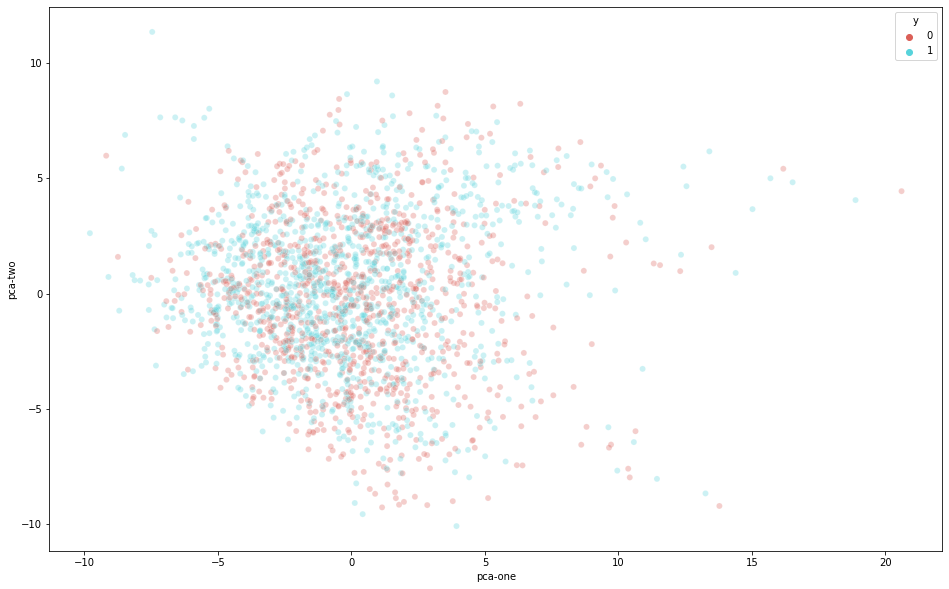

In [56]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

C:\Users\AttiqRafiq\AppData\Local\Temp\ipykernel_11860\1801808602.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().

  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


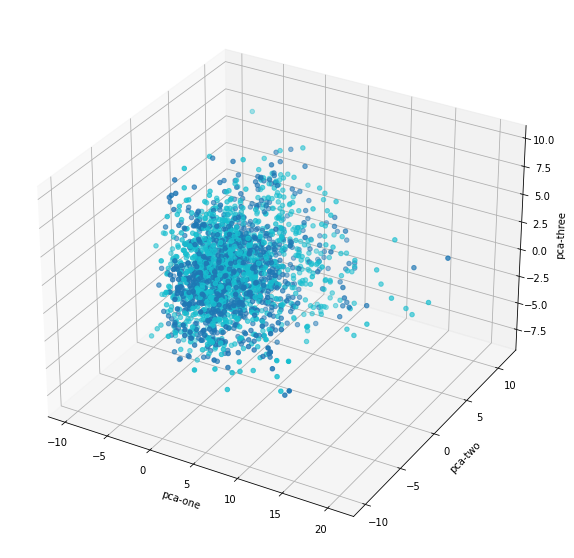

In [57]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [58]:
N = 2202

df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.10204667 0.09076517 0.06818114]


In [59]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

  warnings.warn(

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...

[t-SNE] Indexed 2202 samples in 0.003s...

[t-SNE] Computed neighbors for 2202 samples in 0.639s...

[t-SNE] Computed conditional probabilities for sample 1000 / 2202

[t-SNE] Computed conditional probabilities for sample 2000 / 2202

[t-SNE] Computed conditional probabilities for sample 2202 / 2202

[t-SNE] Mean sigma: 4.839263

[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.843979

[t-SNE] KL divergence after 300 iterations: 1.860857

t-SNE done! Time elapsed: 8.197117328643799 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

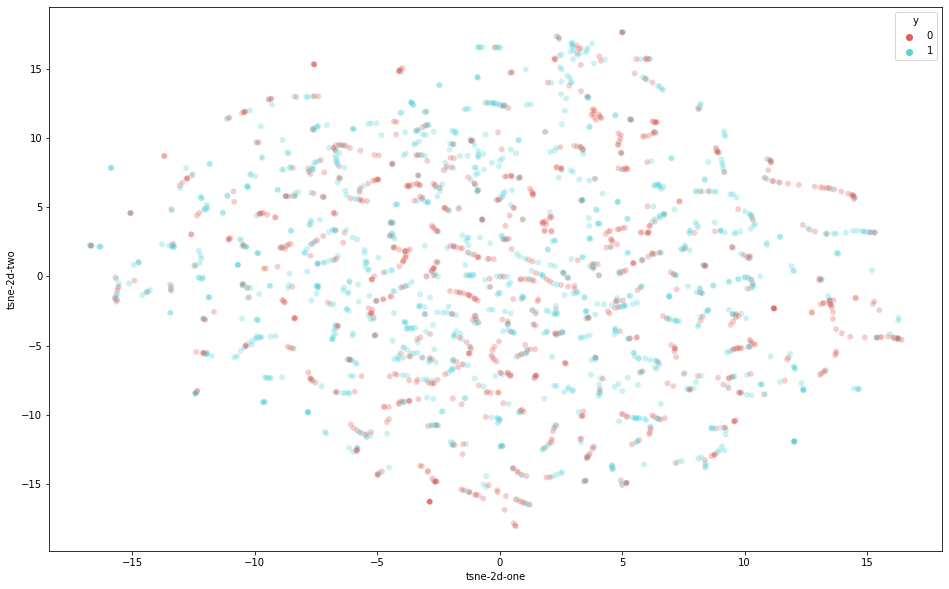

In [60]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

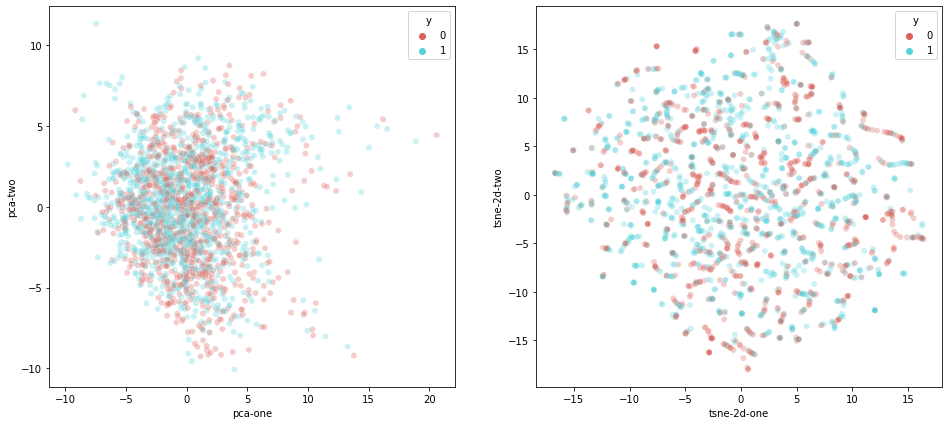

In [61]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [62]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9495576080106181


In [63]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

  warnings.warn(

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

  warnings.warn(


t-SNE done! Time elapsed: 7.7014851570129395 seconds


<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

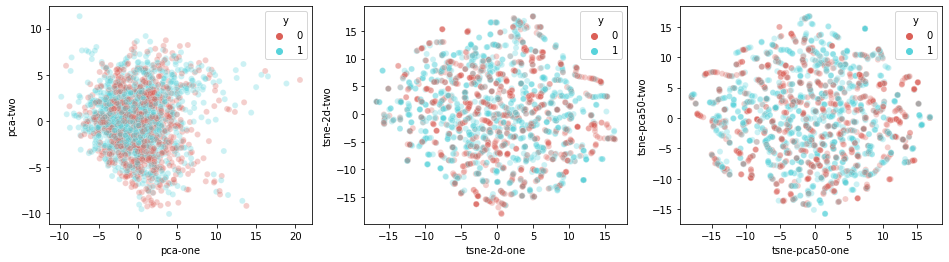

In [64]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

In [65]:
df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols].values

svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd_results = svd.fit_transform(data_subset)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(data_subset)

# df_subset['pca-one'] = pca_result[:,0]
# df_subset['pca-two'] = pca_result[:,1] 
# df_subset['pca-three'] = pca_result[:,2]

[0.10204667 0.09076517 0.06818114]

0.2609929792123123

[166.92405484 157.42695697 136.44311507]


In [66]:
svd_results

array([[-0.27651864,  3.30746419, -0.14747907],
       [ 0.92701919, -3.92976926,  4.72795203],
       [-5.03824149, -1.31907848, -2.35664537],
       ...,
       [-5.64755219,  0.37663637,  1.23872673],
       [ 1.50740752,  4.76052935, -1.83245394],
       [ 2.99428021, -0.46888167, -0.37002829]])

In [67]:
df_subset['pca-one'] = svd_results[:,0]
df_subset['pca-two'] = svd_results[:,1] 
df_subset['pca-three'] = svd_results[:,2]

In [68]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=250, n_iter=1000)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

  warnings.warn(

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

  warnings.warn(


[t-SNE] Computing 751 nearest neighbors...

[t-SNE] Indexed 2202 samples in 0.003s...

[t-SNE] Computed neighbors for 2202 samples in 1.058s...

[t-SNE] Computed conditional probabilities for sample 1000 / 2202

[t-SNE] Computed conditional probabilities for sample 2000 / 2202

[t-SNE] Computed conditional probabilities for sample 2202 / 2202

[t-SNE] Mean sigma: 5.371896

[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.858063

[t-SNE] KL divergence after 1000 iterations: 1.052225

t-SNE done! Time elapsed: 56.15561604499817 seconds


In [69]:
tsne_results

array([[  5.4746566 ,   5.3957586 ],
       [-10.331905  , -18.763382  ],
       [ -3.9633632 ,  13.958064  ],
       ...,
       [  1.8070421 , -12.111822  ],
       [ 14.629775  ,  15.5666275 ],
       [  5.9314485 ,   0.28763768]], dtype=float32)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

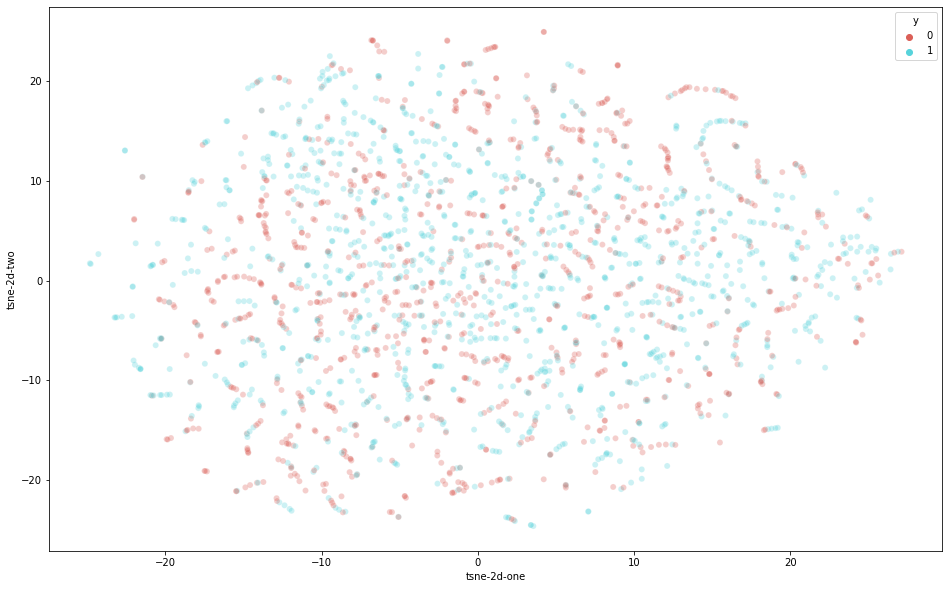

In [70]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

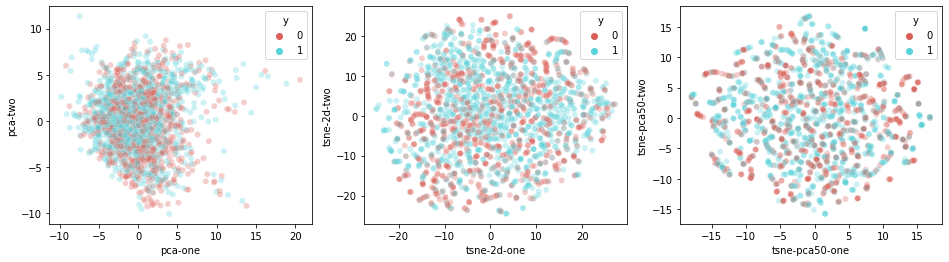

In [71]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

In [77]:
missing_val_count_by_column = (df_main.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [67]:
feat_cols = sel_Fea.columns # [ 'FV'+str(i) for i in range(newX.shape[1]) ]

df = pd.DataFrame(newX,columns=feat_cols)
df['y'] = y
# df['label'] = df['y'].apply(lambda i: str(i))

# X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (2202, 125)


In [68]:
df.head()

,freq_ATG,RAAPIV_ATG,AAPIV_ATG,RAAPIV_GCG,freq_TTT,freq_GCG,AAPIV_TTT,RAAPIV_TTT,RAAPIV_TGA,PKNC_16,...,PKNC_3,freq_AGG,rm_dRPRIM_0,cm_dRPRIM_0,RAAPIV_TAG,AAPIV_GGA,RAAPIV_AA,RAAPIV_ACC,RAAPIV_GAC,y
0,-0.505539,-0.440615,-0.439467,-0.384573,-0.439490,-0.427838,-0.403692,-0.368011,-0.476374,0.084070,...,-1.242075,-0.686817,-0.456506,-0.456345,-0.368319,0.629548,-0.772872,-0.049776,1.511508,1
1,1.525843,2.758837,-0.053311,-0.384573,1.355978,-0.427838,2.074409,0.324605,-0.476374,0.657738,...,-0.507936,0.932425,-0.645755,-0.644962,-0.368319,3.365821,0.741306,-0.453485,-0.478531,0
2,-0.505539,-0.440615,-0.439467,-0.384573,3.151446,-0.427838,4.021489,1.536682,-0.476374,2.423794,...,-1.242075,-0.686817,-0.390885,-0.390749,-0.368319,-0.567572,-0.772872,-0.453485,-0.478531,1
3,-0.505539,-0.440615,-0.439467,-0.384573,-0.439490,-0.427838,-0.403692,-0.368011,2.827179,-0.815758,...,1.702728,0.932425,0.122260,0.121184,-0.368319,0.629548,-0.772872,-0.453485,-0.478531,1
4,-0.505539,-0.440615,-0.439467,-0.384573,-0.439490,-0.427838,-0.403692,-0.368011,-0.476374,0.068558,...,-1.242075,-0.686817,-0.233504,-0.233992,-0.368319,-0.567572,-0.772872,-0.453485,-0.478531,1


In [69]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_circles
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import ExtraTreesClassifier, RandomTreesEmbedding, RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB

# make a synthetic dataset
X, y = df.iloc[:,:-1], df.iloc[:,-1]#.values#make_circles(factor=0.5, random_state=0, noise=0.05)

In [70]:
X = np.asarray(X)#[:,1] #= pd.DataFrame(X)

In [72]:
# X_train, X_test, y_train, y_test = train_test_split(svd_results, y, test_size=0.2, shuffle=True, random_state=42) #newX, xT, y.values, y_test#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42) #newX, xT, y.values, y_test#

In [73]:
type(X_train)

numpy.ndarray

In [74]:
# Visualize result after dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)

# use RandomTreesEmbedding to transform data
hasher = RandomTreesEmbedding(n_estimators=200, random_state=1, n_jobs=-1) # max_depth=3, 
X_transformed = hasher.fit_transform(X_reduced)



# Learn a Naive Bayes classifier on the transformed data
nb = BernoulliNB()
nb.fit(X_transformed, y)


# Learn an ExtraTreesClassifier for comparison
trees = ExtraTreesClassifier(n_estimators=200, random_state=1)
trees.fit(X_reduced, y)


# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50, edgecolor="k")
ax.set_title(
    "Truncated SVD reduction (2d) of transformed data (%dd)" % X_transformed.shape[1]
)
ax.set_xticks(())
ax.set_yticks(())

# Plot the decision in original space. For that, we will assign a color
# to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# transform grid using RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()

NameError: name 'X_transformed' is not defined

In [261]:
X_train.shape

(1761, 124)

In [75]:
# Learn an ExtraTreesClassifier for comparison
trees = RandomForestClassifier(max_depth=50, n_estimators=1000, random_state=21, criterion='entropy', 
                               warm_start=True, min_samples_split=5, 
                               n_jobs=-1, bootstrap=True,
                               min_samples_leaf=3, oob_score=True, max_features=123)
trees.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=123,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=21, warm_start=True)

In [76]:
proba = trees.predict_proba(X_test)[:,1]
r_pred = [1 if val >= 0.5 else 0 for val in proba]#transfer_label_from_prob(proba)
acc, precision, sensitivity, specificity, MCC = calculate_performace(len(y_test), 
                                                         r_pred, y_test.ravel())
print(acc, precision, sensitivity, specificity, MCC)
fpr_keras, tpr_keras, _ = roc_curve(y_test, proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC', auc_keras)

0.7482993197278912 0.7330827067669173 0.8297872340425532 0.6553398058252428 0.49472422921350384
AUC 0.7739723197686429


In [221]:
c = 4#4.4
g = 0.009#'auto'# 0.02025 # 
degree = 1 # default = 3
coef0 = 0.5
shrinking = True
decision_function_shape='ovr'
# Best Param = C = 0.1, gamma='scale', kernal='sigmoid', degree=10, coef0 = 0.0, shrinking = False, decision_function_shape='ovr' 
# Best Results = acc: 0.6679245283018868 0.6589147286821705 0.6589147286821705 0.6764705882352942 mcc: 0.33538531691746465 AUC 0.7120953032375741
svc_clf = SVC(C=c, gamma=g, probability=True , kernel='rbf', coef0=coef0, shrinking=shrinking, 
          degree=degree, decision_function_shape=decision_function_shape)
svc_clf.fit(X_train, y_train)
y_predict = svc_clf.predict(X_test)

proba = svc_clf.predict_proba(X_test)[:,1]
# print(proba) 0.0002500000118743628 /83785
r_pred = [1 if val >= 0.5 else 0 for val in proba]#transfer_label_from_prob(proba)
acc, precision, sensitivity, specificity, MCC = calculate_performace(len(y_test), 
                                                         r_pred, np.array(y_test))
print(acc, precision, sensitivity, specificity, MCC)
fpr_keras, tpr_keras, _ = roc_curve(y_test, proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC', auc_keras)

0.7596371882086168 0.7509727626459144 0.8212765957446808 0.6893203883495146 0.5166189274089475
AUC 0.8015286097913654


In [136]:
c = 0.5
g =  'scale' #0.015 # 
degree = 5 # default = 3
coef0 = 0.2
shrinking = True
decision_function_shape='ovr'
# Best Param = C = 0.1, gamma='scale', kernal='sigmoid', degree=10, coef0 = 0.0, shrinking = False, decision_function_shape='ovr' 
# Best Results = acc: 0.6679245283018868 0.6589147286821705 0.6589147286821705 0.6764705882352942 mcc: 0.33538531691746465 AUC 0.7120953032375741
nuSVC_clf = NuSVC(gamma=g, probability=True , kernel='rbf', coef0=coef0, nu=c,
    shrinking=shrinking, 
          degree=degree, decision_function_shape=decision_function_shape)
nuSVC_clf.fit(X_train, y_train)
# y_predict = nuSVC_clf.predict(X_test)
proba = nuSVC_clf.predict_proba(X_test)[:,1]
# print(proba) 0.0002500000118743628 /83785
r_pred = [1 if val >= 0.5 else 0 for val in proba]#transfer_label_from_prob(proba)
acc, precision, sensitivity, specificity, MCC = calculate_performace(len(y_test), 
                                                         r_pred, np.array(y_test))
print(acc, precision, sensitivity, specificity, MCC)
fpr_keras, tpr_keras, _ = roc_curve(y_test, proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC', auc_keras)

0.7596371882086168 0.7509727626459144 0.8212765957446808 0.6893203883495146 0.5166189274089475
AUC 0.8005783928940301


In [198]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Feature extraction
trees = ExtraTreesClassifier(max_depth=1000, n_estimators=2000, random_state=21, criterion='entropy', 
                               warm_start=True, min_samples_split=5, 
                               n_jobs=-1, bootstrap=True,
                               min_samples_leaf=1, oob_score=True, max_features='sqrt')
# rfe = RFE(trees)
# fit = 
trees.fit(X_train, y_train)
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))

ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=1000,
                     min_samples_split=5, n_estimators=2000, n_jobs=-1,
                     oob_score=True, random_state=21, warm_start=True)

In [197]:
proba = trees.predict_proba(X_test)[:,1]
# print(proba) 0.0002500000118743628 /83785
r_pred = [1 if val >= 0.5 else 0 for val in proba]#transfer_label_from_prob(proba)
acc, precision, sensitivity, specificity, MCC = calculate_performace(len(y_test), 
                                                         r_pred, np.array(y_test))
print(acc, precision, sensitivity, specificity, MCC)
fpr_keras, tpr_keras, _ = roc_curve(y_test, proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC', auc_keras)

0.7619047619047619 0.7480916030534351 0.8340425531914893 0.6796116504854369 0.5218686721067747
AUC 0.7884527990084692


In [222]:
from sklearn.ensemble import VotingClassifier

ensemble_voting=VotingClassifier(estimators= [('NuSVC',nuSVC_clf), ('ETC',trees), ('SVC',svc_clf)], voting='soft') # , ('XGB LD',xgbld)('GBM', gbm), ('Random Forest', rf),
ensemble_voting.fit(X_train,y_train)

#compute accuracy
print('The ensembled model with all the classifiers is:',ensemble_voting.score(X_test,y_test))

The ensembled model with all the classifiers is: 0.7596371882086168


In [223]:
proba = ensemble_voting.predict_proba(X_test)[:,1]
# print(proba) 0.0002500000118743628 /83785
r_pred = [1 if val >= 0.5 else 0 for val in proba]#transfer_label_from_prob(proba)
acc, precision, sensitivity, specificity, MCC = calculate_performace(len(y_test), 
                                                         r_pred, np.array(y_test))
print(acc, precision, sensitivity, specificity, MCC)
fpr_keras, tpr_keras, _ = roc_curve(y_test, proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC', auc_keras)

0.7596371882086168 0.749034749034749 0.825531914893617 0.6844660194174758 0.5168331744309193
AUC 0.8005577360049577


In [228]:
from sklearn.ensemble import StackingClassifier
finalETC = ExtraTreesClassifier(max_depth=1000, n_estimators=2000, random_state=21, criterion='entropy', 
                               warm_start=True, min_samples_split=5, 
                               n_jobs=-1, bootstrap=True,
                               min_samples_leaf=1, oob_score=True, max_features='sqrt')
estimators= [('NuSVC',nuSVC_clf), ('ETC',trees), ('SVC',svc_clf)]
sclf_sk = StackingClassifier(estimators=estimators,final_estimator=finalETC,n_jobs=-1,passthrough=False) # gbm, rf, 
                        #   meta_classifier=xgb)
sclf_sk.fit(X_train,y_train)

StackingClassifier(estimators=[('NuSVC',
                                NuSVC(coef0=0.2, degree=5, probability=True)),
                               ('ETC',
                                ExtraTreesClassifier(bootstrap=True,
                                                     criterion='entropy',
                                                     max_depth=1000,
                                                     min_samples_split=5,
                                                     n_estimators=2000,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=21,
                                                     warm_start=True)),
                               ('SVC',
                                SVC(C=4, coef0=0.5, degree=1, gamma=0.009,
                                    probability=True))],
                   final_estimator=ExtraTreesClassifier(bootstrap=True,
                                                        criterion='entropy',
                                                        max_depth=1000,
                                                        min_samples_split=5,
                                                        n_estimators=2000,
                                                        n_jobs=-1,
                                                        oob_score=True,
                                                        random_state=21,
                                                        warm_start=True),
                   n_jobs=-1)

In [229]:
proba = sclf_sk.predict_proba(X_test)[:,1]
# print(proba) 0.0002500000118743628 /83785
r_pred = [1 if val >= 0.5 else 0 for val in proba]#transfer_label_from_prob(proba)
acc, precision, sensitivity, specificity, MCC = calculate_performace(len(y_test), 
                                                         r_pred, np.array(y_test))
print(acc, precision, sensitivity, specificity, MCC)
fpr_keras, tpr_keras, _ = roc_curve(y_test, proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC', auc_keras)

0.7165532879818595 0.7115384615384616 0.7872340425531915 0.6359223300970874 0.4291829549175685
AUC 0.7637678165668249


In [245]:
import re
import sklearn
from sklearn.model_selection import KFold;
from time import time

In [236]:
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 9 # set folds for out-of-fold prediction
kf = KFold(ntrain, random_state=SEED, shuffle=True)

In [237]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [238]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [239]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [242]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=3)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    start = time()
    rdmsearch.fit(X,y)
    print('hyper-tuning time : %d seconds' % (time()-start))
    start = 0
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [ ]:
est = RandomForestClassifier(n_jobs=-1, n_estimators=1500)
rf_p_dist={'max_depth':[3,5,10,None],
              'max_features':randint(1,6),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,10)
              }
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_train, y_train)
rf_parameters['n_jobs']=-1
rf_parameters['n_estimators']=1500
print(rf_parameters)
print('Hyper-tuned model score :')
print(rf_ht_score)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
